<a href="https://colab.research.google.com/github/JinnyYam/mining22/blob/main/IT_HealthData_2014002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd                  # 판다스 임포트
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt      # 맷플롭 임포트
import seaborn as sns               # 시본 임포트


data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BigMining/health_data.csv")
sns.set_style("whitegrid")

data.info()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10000 non-null  int64  
 1   sex                       10000 non-null  object 
 2   age                       10000 non-null  int64  
 3   height                    10000 non-null  int64  
 4   weight                    10000 non-null  int64  
 5   Lsight                    10000 non-null  float64
 6   Rsight                    10000 non-null  float64
 7   Lhearing                  10000 non-null  int64  
 8   Rhearing                  10000 non-null  int64  
 9   systolic blood pressure   9912 non-null   float64
 10  diastolic blood pressure  9912 non-null   float64
 11  AST                       9912 non-null   f

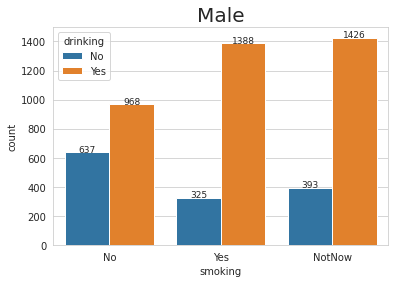

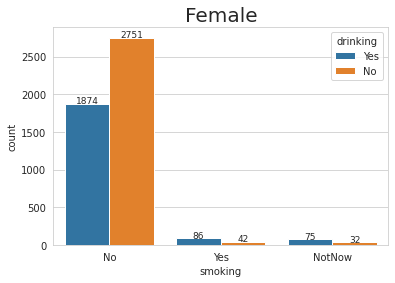

In [9]:
import numpy as np
### 1.남녀별 흡연과 음주 여부
## 데이터 전처리 
data1=data[['sex','smoking','drinking']]
data1=data1.dropna(axis=0)
data1_M=data1[data1['sex']=='M']
data1_F=data1[data1['sex']=='F']
data1_M=data1_M.set_index('sex')
data1_F=data1_F.set_index('sex')

## 남녀 막대 그래프 그리기 
# male 막대 그래프
plt.figure()
plt.title('Male',fontsize=20)
am=sns.countplot(data=data1_M,x='smoking',hue='drinking')
for p in am.patches:
    height = p.get_height()
    am.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()
# female 막대 그래프
plt.figure()
plt.title('Female',fontsize=20)
am=sns.countplot(data=data1_F,x='smoking',hue='drinking')
for p in am.patches:
    height = p.get_height()
    am.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

#####################인사이트 도출########################
#1. 훨씬 많은 수의 남성이 여성보다 흡연을 많이 한다
#2. 담배를 핀 경험이 있는 여성들 중에 술을 먹지않는 사람의 숫자가 더 많다
#3. 담배는 피지 않아도 술은 마신다.

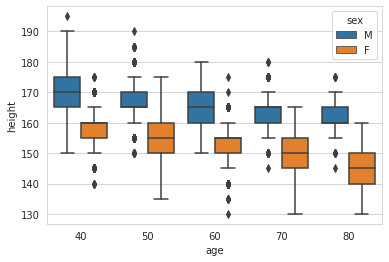

In [10]:
### 2. 나이대별 키의 평균 (박스 그래프)
data2=data[['sex','age','height']]
sns.boxplot(data = data2, x = 'age', y = 'height',hue='sex')

#####################인사이트 도출########################
#1. 나이가 들수록 평균 키는 낮아진다.
#2. 70대와 80대의 키의 분포는 비슷하다
#3. 키의 분산이 가장 큰 나이대는 40대 남성과 50대 여성이다.


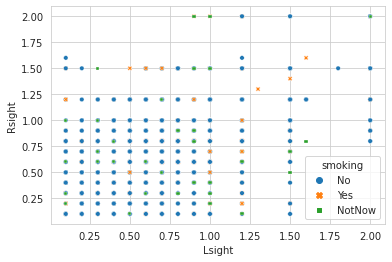

In [11]:
### 3. 나이에 따른 시력
data3=data[['Lsight','Rsight','smoking']]
data3=data3.dropna(axis=0)
#시력이 9.9인 경우 행 제거 (실명 데이터 제거)
del_Lindex=data3[data3['Lsight']==9.9].index
data3.drop(del_Lindex,inplace=True)
del_Rindex=data3[data3['Rsight']==9.9].index
data3.drop(del_Rindex,inplace=True)

sns.scatterplot(data = data3, y = 'Rsight',x='Lsight',hue='smoking',style='smoking',s=20)


#####################인사이트 도출########################
#1. 양쪽 눈의 시력이 비슷하지 않은 사람들이 생각보다 많다.
#2. 시력은 흡연의 유무와는 관련이 없다.